In [40]:
import pandas as pd
from pydub import AudioSegment

In [41]:
csv_path='../data/tira-asr-hf/metadata-combined.csv'
df=pd.read_csv(csv_path, keep_default_na=False)
df.head()

,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,file_name,path,allosaurus,clap_ipa_cos_sim,wada_snr,nist_stnr,speaker-diarization-3.1,voice-activity-detection,whisper-large-v3,clapipa-transcription-allosaurus
0,184240.0,189330.0,mə̀nà càt̪á án âjt̪ɔ́ ŋìðə̀nɔ́ŋ ŋírɔ́t̪...,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,mə̀nà tʃàt̪á án âjt̪ɔ́ ŋìðə̀nɔ́ŋ ŋírɔ́t...,data/tira-asr/clips/HH20220719-1-m03s04ms240-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m03s04ms240-m...,HH20220719-1-m03s04ms240-m03s09ms330.wav,m ɛ m a k a t̪ a n a j t̪ a ð ɛ n e ɔ r a d̪ e...,0.673431,14.081620,25.00,0.031 5.009 SPEAKER_00\n,0.031 3.642 SPEECH;4.098 4.942 SPEECH;,ለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለ...,0.7697
1,271280.0,272310.0,íŋgáŋâɽìɲǎ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,íŋgáŋâɽìɲǎ,data/tira-asr/clips/HH20220719-1-m04s31ms280-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m04s31ms280-m...,HH20220719-1-m04s31ms280-m04s32ms310.wav,ɲ i n k a ŋ n a d i ɲ a,0.523998,5.625207,16.25,0.031 1.094 SPEAKER_00\n,0.098 1.043 SPEECH;,hingga nganginya,0.7191
2,275030.0,276050.0,íŋgáŋâɽìɲǎ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,íŋgáŋâɽìɲǎ,data/tira-asr/clips/HH20220719-1-m04s35ms030-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m04s35ms030-m...,HH20220719-1-m04s35ms030-m04s36ms050.wav,i ɲ t a ŋ a ɲ j a,0.527971,4.222627,20.00,0.031 1.060 SPEAKER_00\n,0.031 0.959 SPEECH;,Gak ngalirnya,0.5247
3,304295.0,305015.0,íŋgáŋâɽìɲǎ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,íŋgáŋâɽìɲǎ,data/tira-asr/clips/HH20220719-1-m05s04ms295-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m05s04ms295-m...,HH20220719-1-m05s04ms295-m05s05ms015.wav,t a ŋ v a,0.616754,2.189131,3.50,0.031 0.773 SPEAKER_00\n,0.031 0.723 SPEECH;,gone already now,0.1008
4,331510.0,333800.0,ŋìðə̀ní ŋrɔ̀t̪ɔ́ t̪ɔ́wə̀nì,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ŋìðə̀ní ŋrɔ̀t̪ɔ́ t̪ɔ́wə̀nì,data/tira-asr/clips/HH20220719-1-m05s31ms510-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m05s31ms510-m...,HH20220719-1-m05s31ms510-m05s33ms800.wav,e v e m e ŋ n r o a t̪ ɔ t o n e,0.749451,15.113453,26.00,0.031 2.191 SPEAKER_00\n,0.031 2.191 SPEECH;,Ngini ngroto tawoni.,0.7299


In [42]:
df['speaker-diarization-3.1']=df['speaker-diarization-3.1'].apply(lambda s: s.replace('\n', '; ').strip().removesuffix(';'))
df['speaker-diarization-3.1']

0        0.031 5.009 SPEAKER_00
1        0.031 1.094 SPEAKER_00
2        0.031 1.060 SPEAKER_00
3        0.031 0.773 SPEAKER_00
4        0.031 2.191 SPEAKER_00
                  ...          
23456    0.031 2.545 SPEAKER_00
23457    0.031 3.068 SPEAKER_00
23458    0.031 1.870 SPEAKER_00
23459    0.031 2.528 SPEAKER_00
23460    0.031 2.343 SPEAKER_00
Name: speaker-diarization-3.1, Length: 23461, dtype: object

In [43]:
df['voice-activity-detection']=df['voice-activity-detection'].apply(lambda s: s.replace('\n', '; ').strip().removesuffix(';'))
df['voice-activity-detection']

0                    0.031 3.642 SPEECH;4.098 4.942 SPEECH
1                                       0.098 1.043 SPEECH
2                                       0.031 0.959 SPEECH
3                                       0.031 0.723 SPEECH
4                                       0.031 2.191 SPEECH
                               ...                        
23456                0.132 1.482 SPEECH;2.090 2.478 SPEECH
23457    0.183 0.942 SPEECH;1.212 1.769 SPEECH;2.512 2....
23458                                   0.267 1.887 SPEECH
23459                0.031 0.942 SPEECH;1.685 2.444 SPEECH
23460                0.065 1.347 SPEECH;1.651 2.292 SPEECH
Name: voice-activity-detection, Length: 23461, dtype: object

In [52]:
def get_speech_time(s):
    segments = s.split(sep=';')
    duration=0
    for segment in segments:
        if not segment:
            continue
        start, end = segment.split()[:2]
        start, end = float(start), float(end)
        duration+=end-start
    return duration
df['vad_s']=df['voice-activity-detection'].apply(get_speech_time)
df['drz_s']=df['speaker-diarization-3.1'].apply(get_speech_time)
df

,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,file_name,path,allosaurus,clap_ipa_cos_sim,wada_snr,nist_stnr,speaker-diarization-3.1,voice-activity-detection,whisper-large-v3,clapipa-transcription-allosaurus,vad_s,drz_s
0,184240.0,189330.0,mə̀nà càt̪á án âjt̪ɔ́ ŋìðə̀nɔ́ŋ ŋírɔ́t̪...,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,mə̀nà tʃàt̪á án âjt̪ɔ́ ŋìðə̀nɔ́ŋ ŋírɔ́t...,data/tira-asr/clips/HH20220719-1-m03s04ms240-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m03s04ms240-m...,HH20220719-1-m03s04ms240-m03s09ms330.wav,m ɛ m a k a t̪ a n a j t̪ a ð ɛ n e ɔ r a d̪ e...,0.673431,14.081620,25.00,0.031 5.009 SPEAKER_00,0.031 3.642 SPEECH;4.098 4.942 SPEECH,ለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለለ...,0.7697,4.455,4.978
1,271280.0,272310.0,íŋgáŋâɽìɲǎ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,íŋgáŋâɽìɲǎ,data/tira-asr/clips/HH20220719-1-m04s31ms280-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m04s31ms280-m...,HH20220719-1-m04s31ms280-m04s32ms310.wav,ɲ i n k a ŋ n a d i ɲ a,0.523998,5.625207,16.25,0.031 1.094 SPEAKER_00,0.098 1.043 SPEECH,hingga nganginya,0.7191,0.945,1.063
2,275030.0,276050.0,íŋgáŋâɽìɲǎ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,íŋgáŋâɽìɲǎ,data/tira-asr/clips/HH20220719-1-m04s35ms030-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m04s35ms030-m...,HH20220719-1-m04s35ms030-m04s36ms050.wav,i ɲ t a ŋ a ɲ j a,0.527971,4.222627,20.00,0.031 1.060 SPEAKER_00,0.031 0.959 SPEECH,Gak ngalirnya,0.5247,0.928,1.029
3,304295.0,305015.0,íŋgáŋâɽìɲǎ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,íŋgáŋâɽìɲǎ,data/tira-asr/clips/HH20220719-1-m05s04ms295-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m05s04ms295-m...,HH20220719-1-m05s04ms295-m05s05ms015.wav,t a ŋ v a,0.616754,2.189131,3.50,0.031 0.773 SPEAKER_00,0.031 0.723 SPEECH,gone already now,0.1008,0.692,0.742
4,331510.0,333800.0,ŋìðə̀ní ŋrɔ̀t̪ɔ́ t̪ɔ́wə̀nì,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ŋìðə̀ní ŋrɔ̀t̪ɔ́ t̪ɔ́wə̀nì,data/tira-asr/clips/HH20220719-1-m05s31ms510-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220719-1-m05s31ms510-m...,HH20220719-1-m05s31ms510-m05s33ms800.wav,e v e m e ŋ n r o a t̪ ɔ t o n e,0.749451,15.113453,26.00,0.031 2.191 SPEAKER_00,0.031 2.191 SPEECH,Ngini ngroto tawoni.,0.7299,2.160,2.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23456,2237782.0,2240488.0,t̪àrɔ́t̪ɛ́ t̪á úrnɔ̀ t̪àŋòŋ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,t̪àrɔ́t̪ɛ́ t̪á úrnɔ̀ t̪àŋòŋ,data/tira-asr/clips/HH20210830-m37s17ms782-m37...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20210830-m37s17ms782-m37...,HH20210830-m37s17ms782-m37s20ms488.wav,t a r u d̪ ɛ t a o r d a t a,0.727120,18.312846,24.00,0.031 2.545 SPEAKER_00,0.132 1.482 SPEECH;2.090 2.478 SPEECH,"Tarote ta orna, ta nganta.",0.8200,1.738,2.514
23457,2249861.0,2252982.0,t̪àrɔ́t̪ɛ́ t̪á úrnɔ̀ t̪àŋòŋ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,t̪àrɔ́t̪ɛ́ t̪á úrnɔ̀ t̪àŋòŋ,data/tira-asr/clips/HH20210830-m37s29ms861-m37...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20210830-m37s29ms861-m37...,HH20210830-m37s29ms861-m37s32ms982.wav,t̪ a r u t ɛ t̪ t a b u r n ɔ k a m u,0.729792,18.265378,23.50,0.031 3.068 SPEAKER_00,0.183 0.942 SPEECH;1.212 1.769 SPEECH;2.512 2....,"taroteta, horno, chamo.",0.7678,1.704,3.037
23458,2313888.0,2315750.0,t̪àrɔ́ŋt̪ɛ́ t̪á t̪àŋ

In [55]:
df['pcnt_speech']=df['vad_s']*1000/(df['end']-df['start'])
df['pcnt_speech']

0        0.875246
1        0.917476
2        0.909804
3        0.961111
4        0.943231
           ...   
23456    0.642276
23457    0.545979
23458    0.870032
23459    0.666401
23460    0.834635
Name: pcnt_speech, Length: 23461, dtype: float64

In [53]:
df['trans_len']=df['transcription'].str.len()

In [56]:
df[['vad_s', 'drz_s', 'trans_len']].corr()

,vad_s,drz_s,trans_len,pcnt_speech
vad_s,1.000000,0.961224,0.690099,-0.049453
drz_s,0.961224,1.000000,0.671353,-0.203867
trans_len,0.690099,0.671353,1.000000,-0.028107
pcnt_speech,-0.049453,-0.203867,-0.028107,1.000000


In [59]:
df[['pcnt_speech', 'clap_ipa_cos_sim']].corr()

,pcnt_speech,clap_ipa_cos_sim
pcnt_speech,1.000000,0.121759
clap_ipa_cos_sim,0.121759,1.000000


<Axes: >

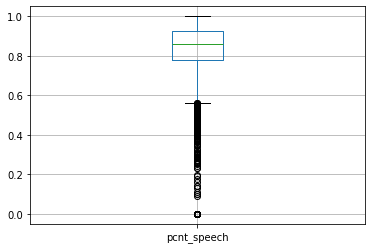

In [60]:
df.boxplot('pcnt_speech')

In [68]:
AudioSegment.from_wav('../'+df.sort_values('pcnt_speech').iloc[4000]['clip'])

In [71]:
spch_60=df['pcnt_speech']>0.6
df.shape, df[spch_60].shape

((23461, 22), (22634, 22))

In [72]:
cos_60 = df['clap_ipa_cos_sim']>0.6
df.shape, df[cos_60].shape

((23461, 22), (21104, 22))

In [74]:
df.shape, df[spch_60&cos_60].shape

((23461, 22), (20478, 22))

In [75]:
df.to_csv(csv_path)

# Explore VAD output

In [44]:
no_vad=df['voice-activity-detection']==''
df[no_vad].head()

,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,file_name,path,allosaurus,clap_ipa_cos_sim,wada_snr,nist_stnr,speaker-diarization-3.1,voice-activity-detection,whisper-large-v3,clapipa-transcription-allosaurus
485,71728.0,74434.0,áɽə́ŋát̪ɔ́ ŋávɛ́,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,áɽə́ŋát̪ɔ́ ŋávɛ́,data/tira-asr/clips/HH20220220-1-m01s11ms728-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m01s11ms728-m...,HH20220220-1-m01s11ms728-m01s14ms434.wav,a e i,0.272442,2.451369,5.75,,,Thank you.,0.1832
490,110836.0,112359.0,àɽə̀ŋàt̪á ŋávɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àɽə̀ŋàt̪á ŋávɛ̀,data/tira-asr/clips/HH20220220-1-m01s50ms836-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m01s50ms836-m...,HH20220220-1-m01s50ms836-m01s52ms359.wav,,0.231423,-2.876546,4.75,,,Thank you.,-0.1879
491,139388.0,141435.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s19ms388-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s19ms388-m...,HH20220220-1-m02s19ms388-m02s21ms435.wav,,0.280254,-20.000000,4.75,,,Thank you.,-0.1472
492,142401.0,144732.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s22ms401-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s22ms401-m...,HH20220220-1-m02s22ms401-m02s24ms732.wav,,0.290935,-5.546748,4.25,,,Undertexter av Nicolai Winther,-0.1472
493,149963.0,151981.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s29ms963-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s29ms963-m...,HH20220220-1-m02s29ms963-m02s31ms981.wav,a,0.085982,-5.436836,4.00,,,Okay.,0.2841


In [45]:
AudioSegment.from_wav('../'+df[no_vad].iloc[74]['clip'])

In [46]:
no_drz=df['speaker-diarization-3.1']==''
df[no_drz].head()

,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,file_name,path,allosaurus,clap_ipa_cos_sim,wada_snr,nist_stnr,speaker-diarization-3.1,voice-activity-detection,whisper-large-v3,clapipa-transcription-allosaurus
485,71728.0,74434.0,áɽə́ŋát̪ɔ́ ŋávɛ́,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,áɽə́ŋát̪ɔ́ ŋávɛ́,data/tira-asr/clips/HH20220220-1-m01s11ms728-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m01s11ms728-m...,HH20220220-1-m01s11ms728-m01s14ms434.wav,a e i,0.272442,2.451369,5.75,,,Thank you.,0.1832
490,110836.0,112359.0,àɽə̀ŋàt̪á ŋávɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àɽə̀ŋàt̪á ŋávɛ̀,data/tira-asr/clips/HH20220220-1-m01s50ms836-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m01s50ms836-m...,HH20220220-1-m01s50ms836-m01s52ms359.wav,,0.231423,-2.876546,4.75,,,Thank you.,-0.1879
491,139388.0,141435.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s19ms388-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s19ms388-m...,HH20220220-1-m02s19ms388-m02s21ms435.wav,,0.280254,-20.000000,4.75,,,Thank you.,-0.1472
492,142401.0,144732.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s22ms401-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s22ms401-m...,HH20220220-1-m02s22ms401-m02s24ms732.wav,,0.290935,-5.546748,4.25,,,Undertexter av Nicolai Winther,-0.1472
493,149963.0,151981.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s29ms963-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s29ms963-m...,HH20220220-1-m02s29ms963-m02s31ms981.wav,a,0.085982,-5.436836,4.00,,,Okay.,0.2841


In [47]:
by_snr=df.sort_values('wada_snr', ascending=True)
by_snr


,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,file_name,path,allosaurus,clap_ipa_cos_sim,wada_snr,nist_stnr,speaker-diarization-3.1,voice-activity-detection,whisper-large-v3,clapipa-transcription-allosaurus
571,1708014.0,1709969.0,ùtìðɔ́ kɔ́cɔ̀ŋù t̪ɔ̀wə̀nǐ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ùʈìðɔ́ kɔ́tʃɔ̀ŋù t̪ɔ̀wə̀nǐ,data/tira-asr/clips/HH20220220-1-m28s28ms014-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m28s28ms014-m...,HH20220220-1-m28s28ms014-m28s29ms969.wav,a ə a ʂ a ʂ ɔ,0.194071,-20.0,3.50,,,Okay.,0.1315
8038,1299217.0,1299677.0,káŋvə́lɛ̂ðà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,káŋvə́lɛ̂ðà,data/tira-asr/clips/HH20210305-m21s39ms217-m21...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20210305-m21s39ms217-m21...,HH20210305-m21s39ms217-m21s39ms677.wav,e t̪ a,0.448350,-20.0,2.25,0.031 0.520 SPEAKER_00,0.031 0.487 SPEECH,"Eu vou ler, né?",0.0669
491,139388.0,141435.0,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,láɽə̀ŋàt̪à ŋávɛ́ nd̪ɔ̀bà,data/tira-asr/clips/HH20220220-1-m02s19ms388-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220220-1-m02s19ms388-m...,HH20220220-1-m02s19ms388-m02s21ms435.wav,,0.280254,-20.0,4.75,,,Thank you.,-0.1472
9395,700901.0,702381.0,nɛ̀là nìcə̀lò,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,nɛ̀là nìtʃə̀lò,data/tira-asr/clips/HH20220326-2-m11s40ms901-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220326-2-m11s40ms901-m...,HH20220326-2-m11s40ms901-m11s42ms381.wav,n ɛ l a d e d̪ u l u,0.755806,-20.0,4.75,0.031 1.516 SPEAKER_00,0.115 1.499 SPEECH,"Néla, Nechelo,",0.6743
9394,698771.0,700051.0,ɛ̀là kìcə̀lò,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ɛ̀là kìtʃə̀lò,data/tira-asr/clips/HH20220326-2-m11s38ms771-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20220326-2-m11s38ms771-m...,HH20220326-2-m11s38ms771-m11s40ms051.wav,e ð e l a k i k e l o,0.729497,-20.0,5.00,0.031 1.364 SPEAKER_00,0.115 1.263 SPEECH,Ela kichilu.,0.8640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11338,914634.0,916199.0,kàðə́nɔ̀nà lùnɔ̀ t̪àwə̀nì,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,kàðə́nɔ̀nà lùnɔ̀ t̪àwə̀nì,data/tira-asr/clips/HH20230510-2-m15s14ms634-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20230510-2-m15s14ms634-m...,HH20230510-2-m15s14ms634-m15s16ms199.wav,p a l n a n a l u n a k o w a n e,0.742630,100.0,70.50,0.031 1.381 SPEAKER_00,0.149 1.364 SPEECH,"Fadhana narluna, otkawalni.",0.7202
3303,2103840.0,2106160.0,làɾɛ́ ðə́gɔ̀cɔ̀ ŋávɛ́ d̪úd̪ɔ̀ ùnɛ̀ɾɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,làɾɛ́ ðə́ɣɔ̀tʃɔ̀ ŋávɛ́ d̪úd̪ɔ̀ ùnɛ̀ɾɛ̀,data/tira-asr/clips/HH20230516-m35s03ms840-m35...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20230516-m35s03ms840-m35...,HH20230516-m35s03ms840-m35s06ms160.wav,l a r a ð e v o i o n a ð e ð e ð o n a ð e,0.678819,100.0,69.75,0.166 2.225 SPEAKER_00,0.250 2.123 SPEECH,லாராது கொஞ்சம் அவைது தொன்னாரே,0.7219
11339,929501.0,930866.0,kàðə́nɔ̀nà lùnɔ̀ t̪àwə̀nì,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,kàðə́nɔ̀nà lùnɔ̀ t̪àwə̀nì,data/tira-asr/clips/HH20230510-2-m15s29ms501-m...,/Users/markjos/Library/CloudStorage/GoogleDriv...,data/tira-asr/clips/HH20230510-2-m15s29ms501-m...,HH20230510-2-m15s29ms501-m15s30ms866.wav,k a l o n o n e l u n a t o n e,0.719478,100.0,69.00,0.031 1.330 SPEAKER_00

In [48]:
AudioSegment.from_wav('../'+by_snr.iloc[20000]['clip'])